# Agent survey simulation

### Assumptions:
###### 1. No prior knowledge of agents (Vasily)
###### 2. Agents' attributes follows standard distritution (1~100)
###### 3. Initial items' attributes are uniformly distributed (1~100) (not following standard distribution)



In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import plotly.express as px

In [76]:
class Agent():
    def __init__(self):
        self.attr = np.random.randn()*16+50
    def choose(self,item):
        self.choice = item

In [77]:
class Item():
    def __init__(self):
        self.attr = np.random.rand()*100
        

In [107]:
number_of_agents = 100
max_items_per_questionaire = 30
initial_no_of_items = 5

### Thompson Sampling 

In [108]:
number_of_checks = np.zeros(initial_no_of_items)  #[0,0,0,0,0]
number_of_ignores = np.zeros(initial_no_of_items) #[0,0,0,0,0]
item_list = [] #list that holds ALL possible items, the whole database
diff_list = []
agent_list = []
beta_list = []
max_beta_index = []
chosen_attr_list = []
agent_attr_list = []

#prep the initial questionaire
for i in range(initial_no_of_items):
    init_item = Item()
    item_list.append(init_item)

for each_agent in range(number_of_agents):
    agent = Agent() # give a random attr in the __init__ method
    if len(item_list) <= max_items_per_questionaire: # if the items in the questionaire are less than 30, ask all items:
        for item in item_list:#item_list is a list of items
            diff_list.append(abs(agent.attr - item.attr))
        idx_min = np.argmin(diff_list)
        
        number_of_checks[idx_min] += 1
        for rest in range(len(item_list)): # b += 1 for those ignored items
            if rest != idx_min:
                number_of_ignores += 1        
        
        
    else:
        for count,item in enumerate(item_list): #get beta value for each item in current round
            a = number_of_checks[count]+1
            b = number_of_ignores[count]+1
            item_beta = np.random.beta(a,b) #thompson sampling
            beta_list.append(item_beta) # beta_list consists of beta value for each item in current round
        for i in range(max_items_per_questionaire):#get the largest 30 beta index
            max_beta_index.append(np.argmax(beta_list)) # max_beta_index contains the index of items of largest 30 beta value
            beta_list[max_beta_index[-1]] = -1 #make the largest smallest to expose the next largest number
        for i in max_beta_index:
            diff_list.append(abs(agent.attr - item_list[i].attr))
        idx_min = max_beta_index[np.argmin(diff_list)] # np.argmin(diff_list) is just the index in the max_beta_index
                                                  # the value of max_beta_index returns the index of item whose attr is closest

        number_of_checks[idx_min] += 1
        for rest in max_beta_index: # b += 1 for those ignored items
            if rest != idx_min:
                number_of_ignores += 1

    chosen_attr_list.append(item_list[idx_min].attr)
    agent_attr_list.append(agent.attr)
    
    #register agenct choice       
    agent.choose(item_list[idx_min])
    #add agent to agent list
    agent_list.append(agent)       
            

    #agent add new item     
    new_item = Item()
    new_item.attr = agent.attr
    item_list.append(new_item)     
    number_of_checks = np.append(number_of_checks,0) #[1,0,0,0,0,0]
    number_of_ignores = np.append(number_of_ignores,0)#[0,1,1,1,1,0]
    diff_list = []
    max_beta_index = []
    beta_list = []
   

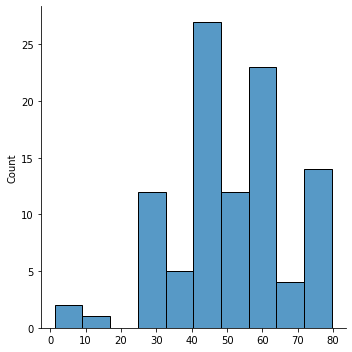

In [109]:
# attributes of chosen items
sns.displot(chosen_attr_list)

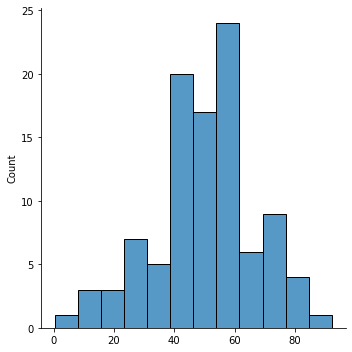

In [110]:
# attributes of agents
sns.displot(agent_attr_list)

In [111]:
fig = px.scatter(
    x=agent_attr_list, y=chosen_attr_list, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

### random sample 

In [112]:
item_list = [] #list that holds ALL possible items, the whole database
diff_list = []
agent_list = []
chosen_attr_list = []
agent_attr_list = []

#prep the initial questionaire
for i in range(initial_no_of_items):
    init_item = Item()
    item_list.append(init_item)

for each_agent in range(number_of_agents):
    agent = Agent() # give a random attr in the __init__ method
    if len(item_list) <= max_items_per_questionaire: # if the items in the questionaire are less than 30, ask all items:
        for item in item_list:#item_list is a list of items
            diff_list.append(abs(agent.attr - item.attr))
        idx_min = np.argmin(diff_list)
    else:
        random.shuffle(item_list)
        for i in range(max_items_per_questionaire):
            diff_list.append(abs(agent.attr - item_list[i].attr))
        idx_min = np.argmin(diff_list)


    chosen_attr_list.append(item_list[idx_min].attr)
    agent_attr_list.append(agent.attr)
    
    #register agenct choice       
    agent.choose(item_list[idx_min])
    #add agent to agent list
    agent_list.append(agent)       
            

    #agent add new item     
    new_item = Item()
    new_item.attr = agent.attr
    item_list.append(new_item)     
    diff_list = []                

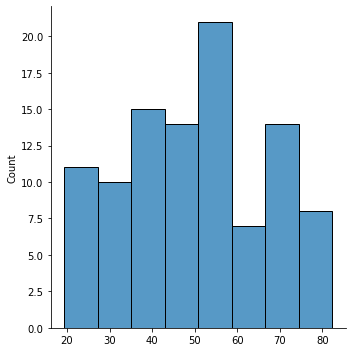

In [113]:
# attributes of chosen items
sns.displot(chosen_attr_list )

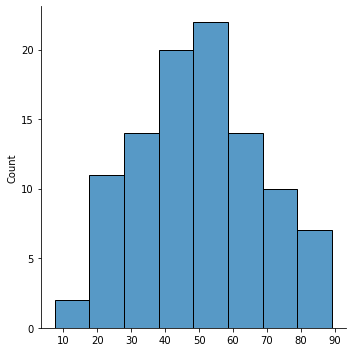

In [114]:
# attributes of agents
sns.displot(agent_attr_list)

In [115]:
fig = px.scatter(
    x=agent_attr_list, y=chosen_attr_list, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

15.939094619962596


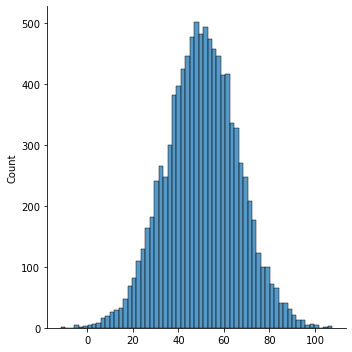

In [14]:
lst = []
for i in range(10000):
    lst.append(np.random.randn()*16+50)
sns.displot(lst)
print(np.std(lst))

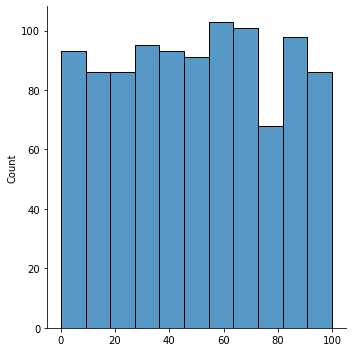

In [15]:
lst = []
for i in range(1000):
    lst.append(np.random.rand()*100)
sns.displot(lst)

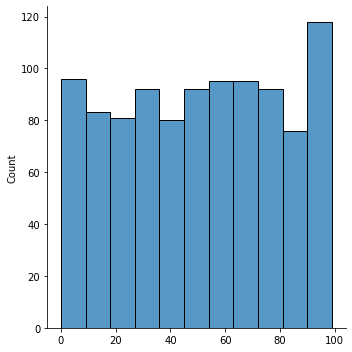

In [16]:
lst = []
for i in range(1000):
    lst.append(np.random.randint(100))
sns.displot(lst)